A word2vec test project, training downloaded from http://www.fit.vutbr.cz/~imikolov/rnnlm/word-test.v1.txt

In [1]:
from gensim.models import word2vec
import numpy as np 

In [2]:
# load data
data = np.loadtxt('word-test.v1.txt', dtype = str)
data = [list(x) for x in data]
print(len(data))
print(data[:10])

19544
[['Athens', 'Greece', 'Baghdad', 'Iraq'], ['Athens', 'Greece', 'Bangkok', 'Thailand'], ['Athens', 'Greece', 'Beijing', 'China'], ['Athens', 'Greece', 'Berlin', 'Germany'], ['Athens', 'Greece', 'Bern', 'Switzerland'], ['Athens', 'Greece', 'Cairo', 'Egypt'], ['Athens', 'Greece', 'Canberra', 'Australia'], ['Athens', 'Greece', 'Hanoi', 'Vietnam'], ['Athens', 'Greece', 'Havana', 'Cuba'], ['Athens', 'Greece', 'Helsinki', 'Finland']]


In [3]:
# train the model
model = word2vec.Word2Vec(
    data,
    size = 100,
    window = 2,
    min_count = 4,
    workers = 10,
)

In [4]:
# test the model
model.wv.most_similar('king')

[('grandpa', 0.9980605244636536),
 ('stepbrother', 0.9980543851852417),
 ('daughters', 0.9979628920555115),
 ('niece', 0.9978985786437988),
 ('policewoman', 0.9978923797607422),
 ('stepmother', 0.9978519678115845),
 ('daughter', 0.9978489875793457),
 ('stepsister', 0.9977530241012573),
 ('grandfather', 0.9977120161056519),
 ('her', 0.9977049827575684)]

In [5]:
model.wv.most_similar('Austin')

[('Dallas', 0.9989383816719055),
 ('Arlington', 0.998765230178833),
 ('Houston', 0.9969500303268433),
 ('Laredo', 0.9958218932151794),
 ('Garland', 0.9951149225234985),
 ('Lubbock', 0.9948947429656982),
 ('Plano', 0.9947965145111084),
 ('Oakland', 0.992268443107605),
 ('Stockton', 0.9921747446060181),
 ('Bakersfield', 0.9920507669448853)]

In [6]:
model.wv.most_similar('Beijing')

[('Chinese', 0.9950757026672363),
 ('Mali', 0.7625383138656616),
 ('Icelandic', 0.7584950923919678),
 ('Albanian', 0.7548519968986511),
 ('Albania', 0.7523831129074097),
 ('Austrian', 0.7520617842674255),
 ('Jordan', 0.7510000467300415),
 ('Colombian', 0.7507845163345337),
 ('Bujumbura', 0.7488154172897339),
 ('Moldova', 0.7458418607711792)]

In [7]:
model.wv.similarity('Chinese','China')
# kinda weird, may need further hyperparameter optimization

0.5664752

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
words = [word for word in model.wv.vocab]
word_vecs = [model.wv.__getitem__(word) for word in words]

In [10]:
print(len(model.wv.vocab))
words2plot = ['China','Beijing','Chinese','Japan','Tokyo','Japanese','Rome','Italian','Italy','London','English','England','Houston','Dallas','Austin','he','she','king','queen','man','woman']
index = [words.index(words2plot[i]) for i in range(len(words2plot))]

905


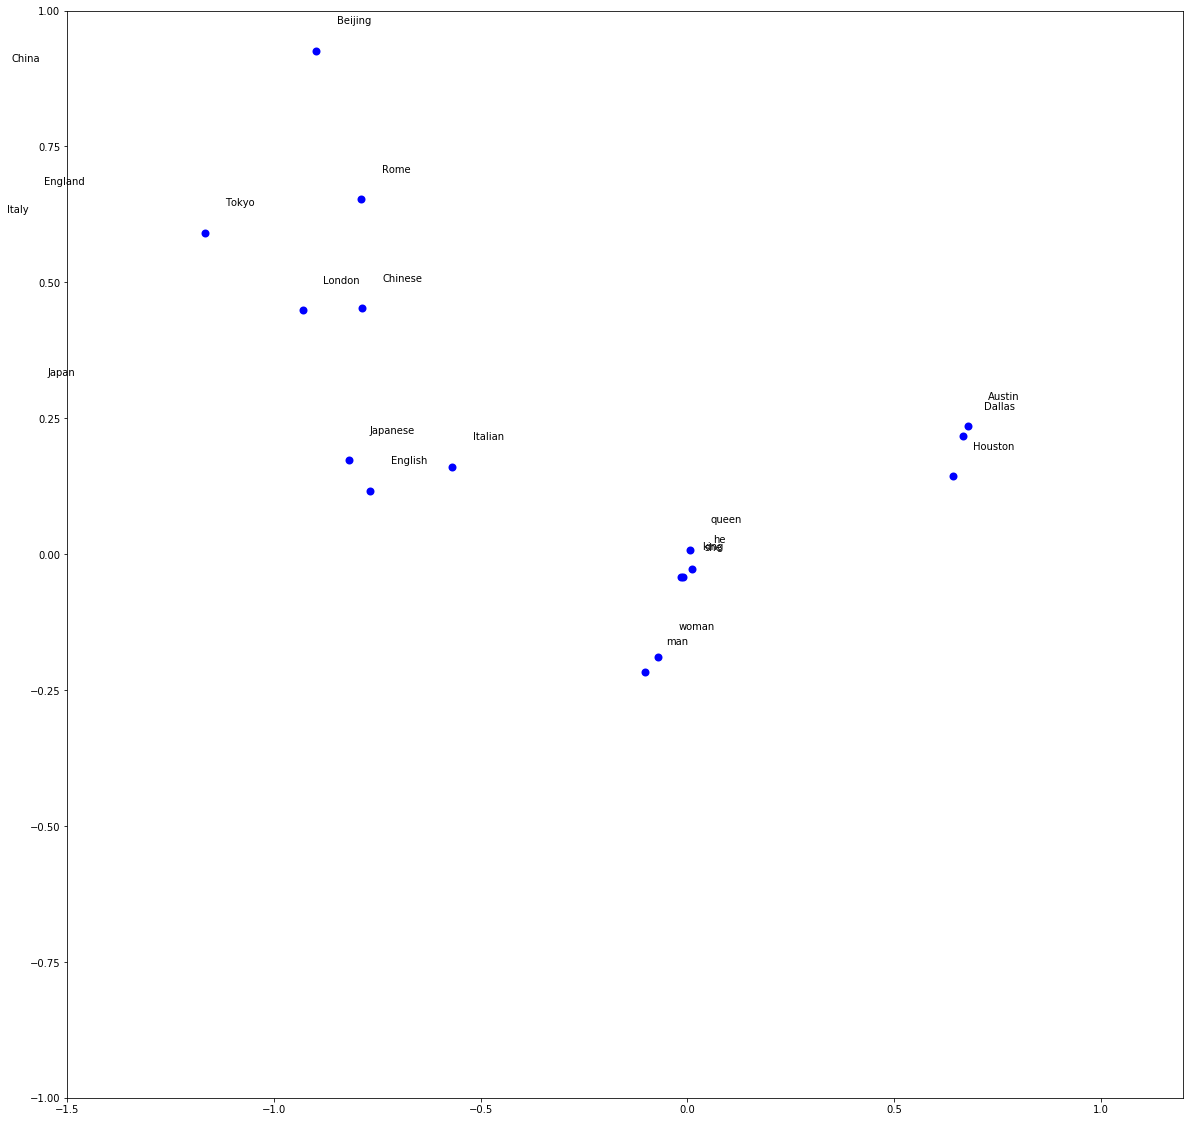

In [11]:
#visualization
pca = PCA(n_components=2)
twodim = pca.fit_transform(word_vecs)
poi = [twodim[x] for x in index]
poi = np.array(poi)
plt.figure(figsize=(20,20))
plt.scatter(poi[:,0],poi[:,1],linewidths=2,color='blue')
plt.xlim(-1.5,1.2)
plt.ylim(-1,1)
for word, (x,y) in zip(words2plot, poi):
        plt.text(x+0.05, y+0.05, word)
plt.show()